<a href="https://colab.research.google.com/github/tejaspradhan/Neural-Algorithmic-Reasoning/blob/main/MNIST_suggested_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPool3D, Dense, Flatten, Dropout, LSTM, BatchNormalization
from tensorflow import random
%matplotlib inline

In [9]:
data = np.load("/content/train_image_data.npy", allow_pickle=True)

In [10]:
x, y= data["x"], data["y"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)

In [13]:
X_train.shape

(700, 3, 28, 28)

In [14]:
#np.array([X_train]).shape

In [15]:
X_train = X_train.reshape(X_train.shape[0], 3, 28, 28, 1)

In [16]:
X_train.shape

(700, 3, 28, 28, 1)

In [17]:
X_test = X_test.reshape(X_test.shape[0], 3, 28, 28, 1)

In [18]:
X_test.shape

(300, 3, 28, 28, 1)

In [53]:
random.set_seed(42)
# add batch norm layer 
# Only last layer should be FC. Replace others with convolution layers 
# add lstm after a couple more conv3d layers reducing dimensionality 
# switch to SGD. 
model = Sequential()
model.add(Conv3D(256, 5, data_format= "channels_last", input_shape=(3,28,28,1), padding='same', activation='relu'))
model.add(MaxPool3D(pool_size=(3,3,3)))
model.add(Conv3D(128, 3,padding='same'))
#model.add(MaxPool3D(pool_size=(3,3,3)))
model.add(Conv3D(64, 3,padding='same'))
model.add(Conv3D(32, 3,padding='same'))
model.add(BatchNormalization())
model.add(Flatten())
#model.add(Dense(64, activation='relu'))
#model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='relu'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_49 (Conv3D)          (None, 3, 28, 28, 256)    32256     
                                                                 
 max_pooling3d_15 (MaxPoolin  (None, 1, 9, 9, 256)     0         
 g3D)                                                            
                                                                 
 conv3d_50 (Conv3D)          (None, 1, 9, 9, 128)      884864    
                                                                 
 conv3d_51 (Conv3D)          (None, 1, 9, 9, 64)       221248    
                                                                 
 conv3d_52 (Conv3D)          (None, 1, 9, 9, 32)       55328     
                                                                 
 batch_normalization_6 (Batc  (None, 1, 9, 9, 32)      128       
 hNormalization)                                     

In [54]:
model.compile(optimizer="sgd", loss="mean_squared_error")

In [55]:
history = model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
22/22 [==============================] - 2s 64ms/step - loss: 1.6573 - val_loss: 1.4226
Epoch 2/100
22/22 [==============================] - 1s 59ms/step - loss: 1.3780 - val_loss: 1.4130
Epoch 3/100
22/22 [==============================] - 1s 52ms/step - loss: 1.3430 - val_loss: 1.4217
Epoch 4/100
22/22 [==============================] - 1s 59ms/step - loss: 1.3486 - val_loss: 1.3909
Epoch 5/100
22/22 [==============================] - 1s 52ms/step - loss: 1.3494 - val_loss: 1.3702
Epoch 6/100
22/22 [==============================] - 1s 52ms/step - loss: 1.3425 - val_loss: 1.3684
Epoch 7/100
22/22 [==============================] - 1s 53ms/step - loss: 1.3455 - val_loss: 1.3660
Epoch 8/100
22/22 [==============================] - 1s 59ms/step - loss: 1.3398 - val_loss: 1.3679
Epoch 9/100
22/22 [==============================] - 1s 52ms/step - loss: 1.3384 - val_loss: 1.3641
Epoch 10/100
22/22 [==============================] - 1s 59ms/step - loss: 1.3414 - val_loss: 1.3638

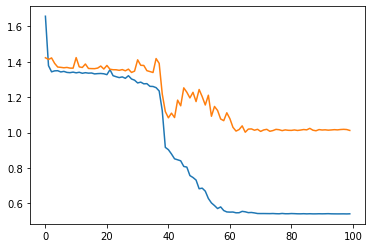

In [56]:
plt.plot(range(100), history.history['loss'])
plt.plot(range(100), history.history['val_loss'])
plt.show()